#### Import

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import numpy as np
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

#### Check whether loaded 

In [74]:
df = pd.read_csv("loan_data.csv")

In [75]:
# Sneak peak into general data types and values
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,381,381,LP001003,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,376,2,Male,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,381,2,Yes,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,373,4,0,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,381,2,Graduate,278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,360,2,No,325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,381.0,NaN,NaN,NaN,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,NaN,NaN,NaN,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,NaN,NaN,NaN,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,NaN,NaN,NaN,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0


#### View general ranges of all variables

In [76]:
# Overview of column dtypes, modes, means
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,381,381,LP001003,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,376,2,Male,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,381,2,Yes,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,373,4,0,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,381,2,Graduate,278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,360,2,No,325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,381.0,NaN,NaN,NaN,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,NaN,NaN,NaN,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,NaN,NaN,NaN,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,NaN,NaN,NaN,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


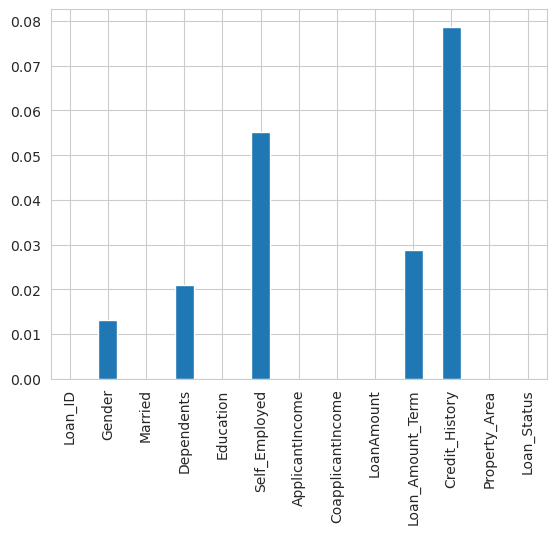

In [78]:
# Print % null values for all variables(max # of non-null values is 381)
plt = (df.isnull().sum()/len(df)).plot(kind='bar')

#### Set target and feature variables

In [79]:
# Set target variable to 'Loan_Status'
target = 'Loan_Status'
features = df.drop(['Loan_ID'], axis=1)

# Create categList and numList for categorical and numerical variables
categList = []
numerList = []

for column in features.columns:
    if column == 'Dependents':
        numerList.append(column)
    elif column == 'Credit_History':
        categList.append(column)
    elif (df.dtypes[column] != float) and (df.dtypes[column] != int):
        categList.append(column)
    else:
        numerList.append(column)

#### Cleaning

In [80]:
# Check for null values
features.isnull().sum()/features.shape[0]*100

Gender               1.312336
Married              0.000000
Dependents           2.099738
Education            0.000000
Self_Employed        5.511811
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.887139
Credit_History       7.874016
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [81]:
def isNaN(num):
    return num != num

# Convert categorical variables to numerical, fill nan with mode
for col in categList:
    value = 1
    valueCode = {}
    mode = features[col].mode()[0]
    
    valueCode[mode] = 0
    for unique in features[col].unique():
        if(isNaN(unique)) or (unique==mode):
            valueCode[unique] = 0
        else:
            valueCode[unique] = value
            value+=1
        
    #print(col,": ",features[col].unique())
    #print(valueCode)
    features[col].replace(valueCode, inplace=True)   
    #print(col,": ",features[col].unique())

In [82]:
# Fill numerical nan with median
for col in numerList:
    value = 1
    valueCode = {}
    
    if col != 'Dependents': 
        median = features[col].median()
    else: #'Dependents' column contains str unique values ['0', '1', '2', '3+'], set to mode since categorical
        median = features[col].mode()[0]
    
    valueCode[median] = 0
    for unique in features[col].unique():
        if(isNaN(unique)) or (unique==median):
            valueCode[unique] = 0
        else:
            valueCode[unique] = value
            value+=1

    features[col].replace(valueCode, inplace=True)

In [83]:
# Check for null values again
features.isnull().sum()/features.shape[0]*100

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

#### Visualize correlations and select variables

Text(0.5, 1.0, 'Correlation Values')

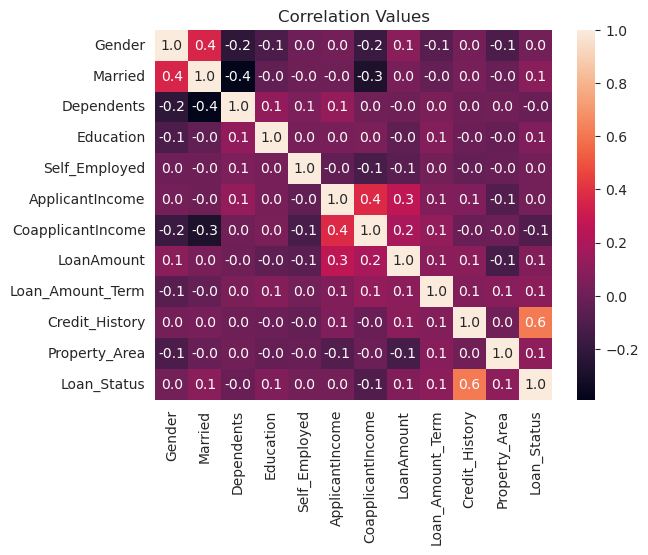

In [84]:
# Create heatmap to check whether variables correlated to each other and can be grouped together
axes = sns.heatmap(features.corr(), annot=True, fmt=".1f")
axes.set_title("Correlation Values")

In [ ]:
# Very low correlation coefficients between variables, cannot be grouped together
# Notice Credit_History has highest correlation with Loan_Status

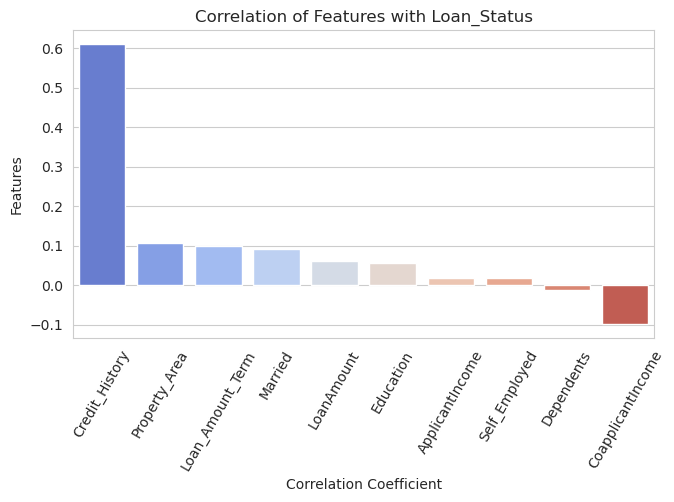

In [87]:
# create Pearson correlations matrix: check variables w/ highest corr to target 'Loan_Status'
correlation_matrix = features[features.columns[1:]].corr()['Loan_Status'][:-1].sort_values(ascending=False)

plt.figure(figsize=(7.5, 4))
sns.set_style("whitegrid")

sns.barplot(y=correlation_matrix.values, x=correlation_matrix.index, palette="coolwarm")

plt.title('Correlation of Features with Loan_Status')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.xticks(rotation=60)
plt.show()

In [88]:
# Ignore features who have correlation coefficients less than 0.5
ignored_features = []

for i in range(len(correlation_matrix)):
    coeff = correlation_matrix.values[i]
    if abs(coeff) < 0.5:
        ignored_features.append(correlation_matrix.index[i])

#### Train Model

In [89]:
# Set X and Y for training model
X = features.drop(columns = ignored_features, axis=1)
Y = features["Loan_Status"]

In [90]:
# Remove missing indices, reset all indices to 0
X = X.reset_index(drop = True)
Y = Y.reset_index(drop = True)

In [91]:
# Split data into train and test groups
x_train , x_test , y_train , y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [92]:
# create Gaussian Classifier
model = GaussianNB()

# train model
model.fit(x_train, y_train)

GaussianNB()

In [93]:
# Calculate model accuracy
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.8125
F1 Score: 0.8334613022113021
